# Machine Learning Engineer Nanodegree

# Introduction and Foundations

# Project: Wine Data Set

These data are the results of a chemical analysis of
wines grown in the same region in Italy but derived from three
different cultivars.
The analysis determined the quantities of 13 constituents
found in each of the three types of wines.

# Getting Started

To begin working with the wine data, we'll first need to import the functionality we need, and load our data into a pandas DataFrame.
Run the code cell below to load our data and display the first few entries (wine samples) for examination using the .head() function.

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'wine_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the wine data
display(full_data.head())

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
2,3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
3,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
4,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


From a sample of the wine data, we can see the various features present for each kind of wine:

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

Since we're interested in the outcome of class for each wine sample, we can remove the Class feature from this dataset and store it as its own separate variable outcomes. We will use these outcomes as our prediction targets.
Run the code cell below to remove Class as a feature of the dataset and store it in outcomes.

In [19]:
# Store the 'Class' feature in a new variable and remove it from the dataset
outcomes = full_data['Class']
data = full_data.drop('Class', axis = 1)

# Show the new dataset with 'Class' removed
display(data.head())

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
2,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
4,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


(178, 13)


The very same sample of the wine data now shows the Class feature removed from the DataFrame. Note that data (the wine data) and outcomes (the outcomes of Class) are now paired. That means for any wine sample data.loc[i], they have the class outcome outcomes[i].
To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of class. Since we are interested in how accurate our predictions are, we will calculate the proportion of wine samples where our prediction of their class is correct. Run the code cell below to create our accuracy_score function and test a prediction on the first five wine samples.

In [12]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 20.00%.


# Making Predictions

If we were asked to make a prediction about any wine sample in the all samples about which we knew nothing about, then the best prediction we could make would be that it would belong to any one class. This is because we can assume that a majority of the wines (more than 30%) belong to class 1.
The predictions_0 function below will always predict that a wine sample belong to class 1.

In [13]:
import matplotlib.pyplot as plt
def predictions_0(data):
    """ Model with no features. Always predicts a wine sample belongs to class 1. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the class of 'wine sample'
        predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 33.15%.


# MATPLOTLIB

Using MATPLOTLIB we plot the histogram of total number of wine samples against the magnesium percentage in the sample. We use the plt function to plot the graph with variant colors and distinct labels. 

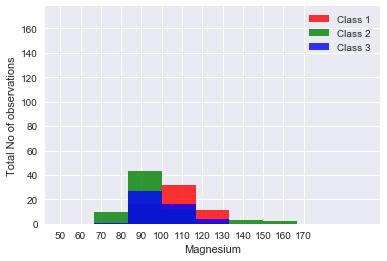

In [14]:
def plot(data,outcomes,key):
        bins=np.linspace(50,200,10)
        all_data = pd.concat([data, outcomes.to_frame()], axis = 1)
        one = all_data[all_data['Class'] == 1][key].reset_index(drop = True)
        two = all_data[all_data['Class'] == 2][key].reset_index(drop = True)
        three = all_data[all_data['Class'] == 3][key].reset_index(drop = True)
        plt.hist(one, bins = bins, alpha = 0.8,
                 color = 'red', label = 'Class 1')
        plt.hist(two, bins = bins, alpha = 0.8,
                 color = 'green', label = 'Class 2')
        plt.hist(three, bins = bins, alpha = 0.8,
                 color = 'blue', label = 'Class 3')
        plt.ylim([0,len(all_data)])
        
        plt.xticks(np.arange(50,180,10))
        # Add legend to plot
        plt.legend(framealpha = 0.8)
        plt.xlabel('Magnesium')
        plt.ylabel('Total No of observations')
plot(data,outcomes,"Magnesium")

Using Matplotlib we have made histogram so as to classifiy types of wine(Class) depending upon its features.Plot was done between Magnesium(X-axis) vs total no observations(Y-axis), we can see that if Magnesium is below 80 and above 140 we can say that the sample belongs tom class 2. Although small these type of observations can be used to prdict the class of a wine sample. 

# Seaborn Representation

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Using seaborn we have formed scatter plot of all the features against themselves to understand the relation between all the features.

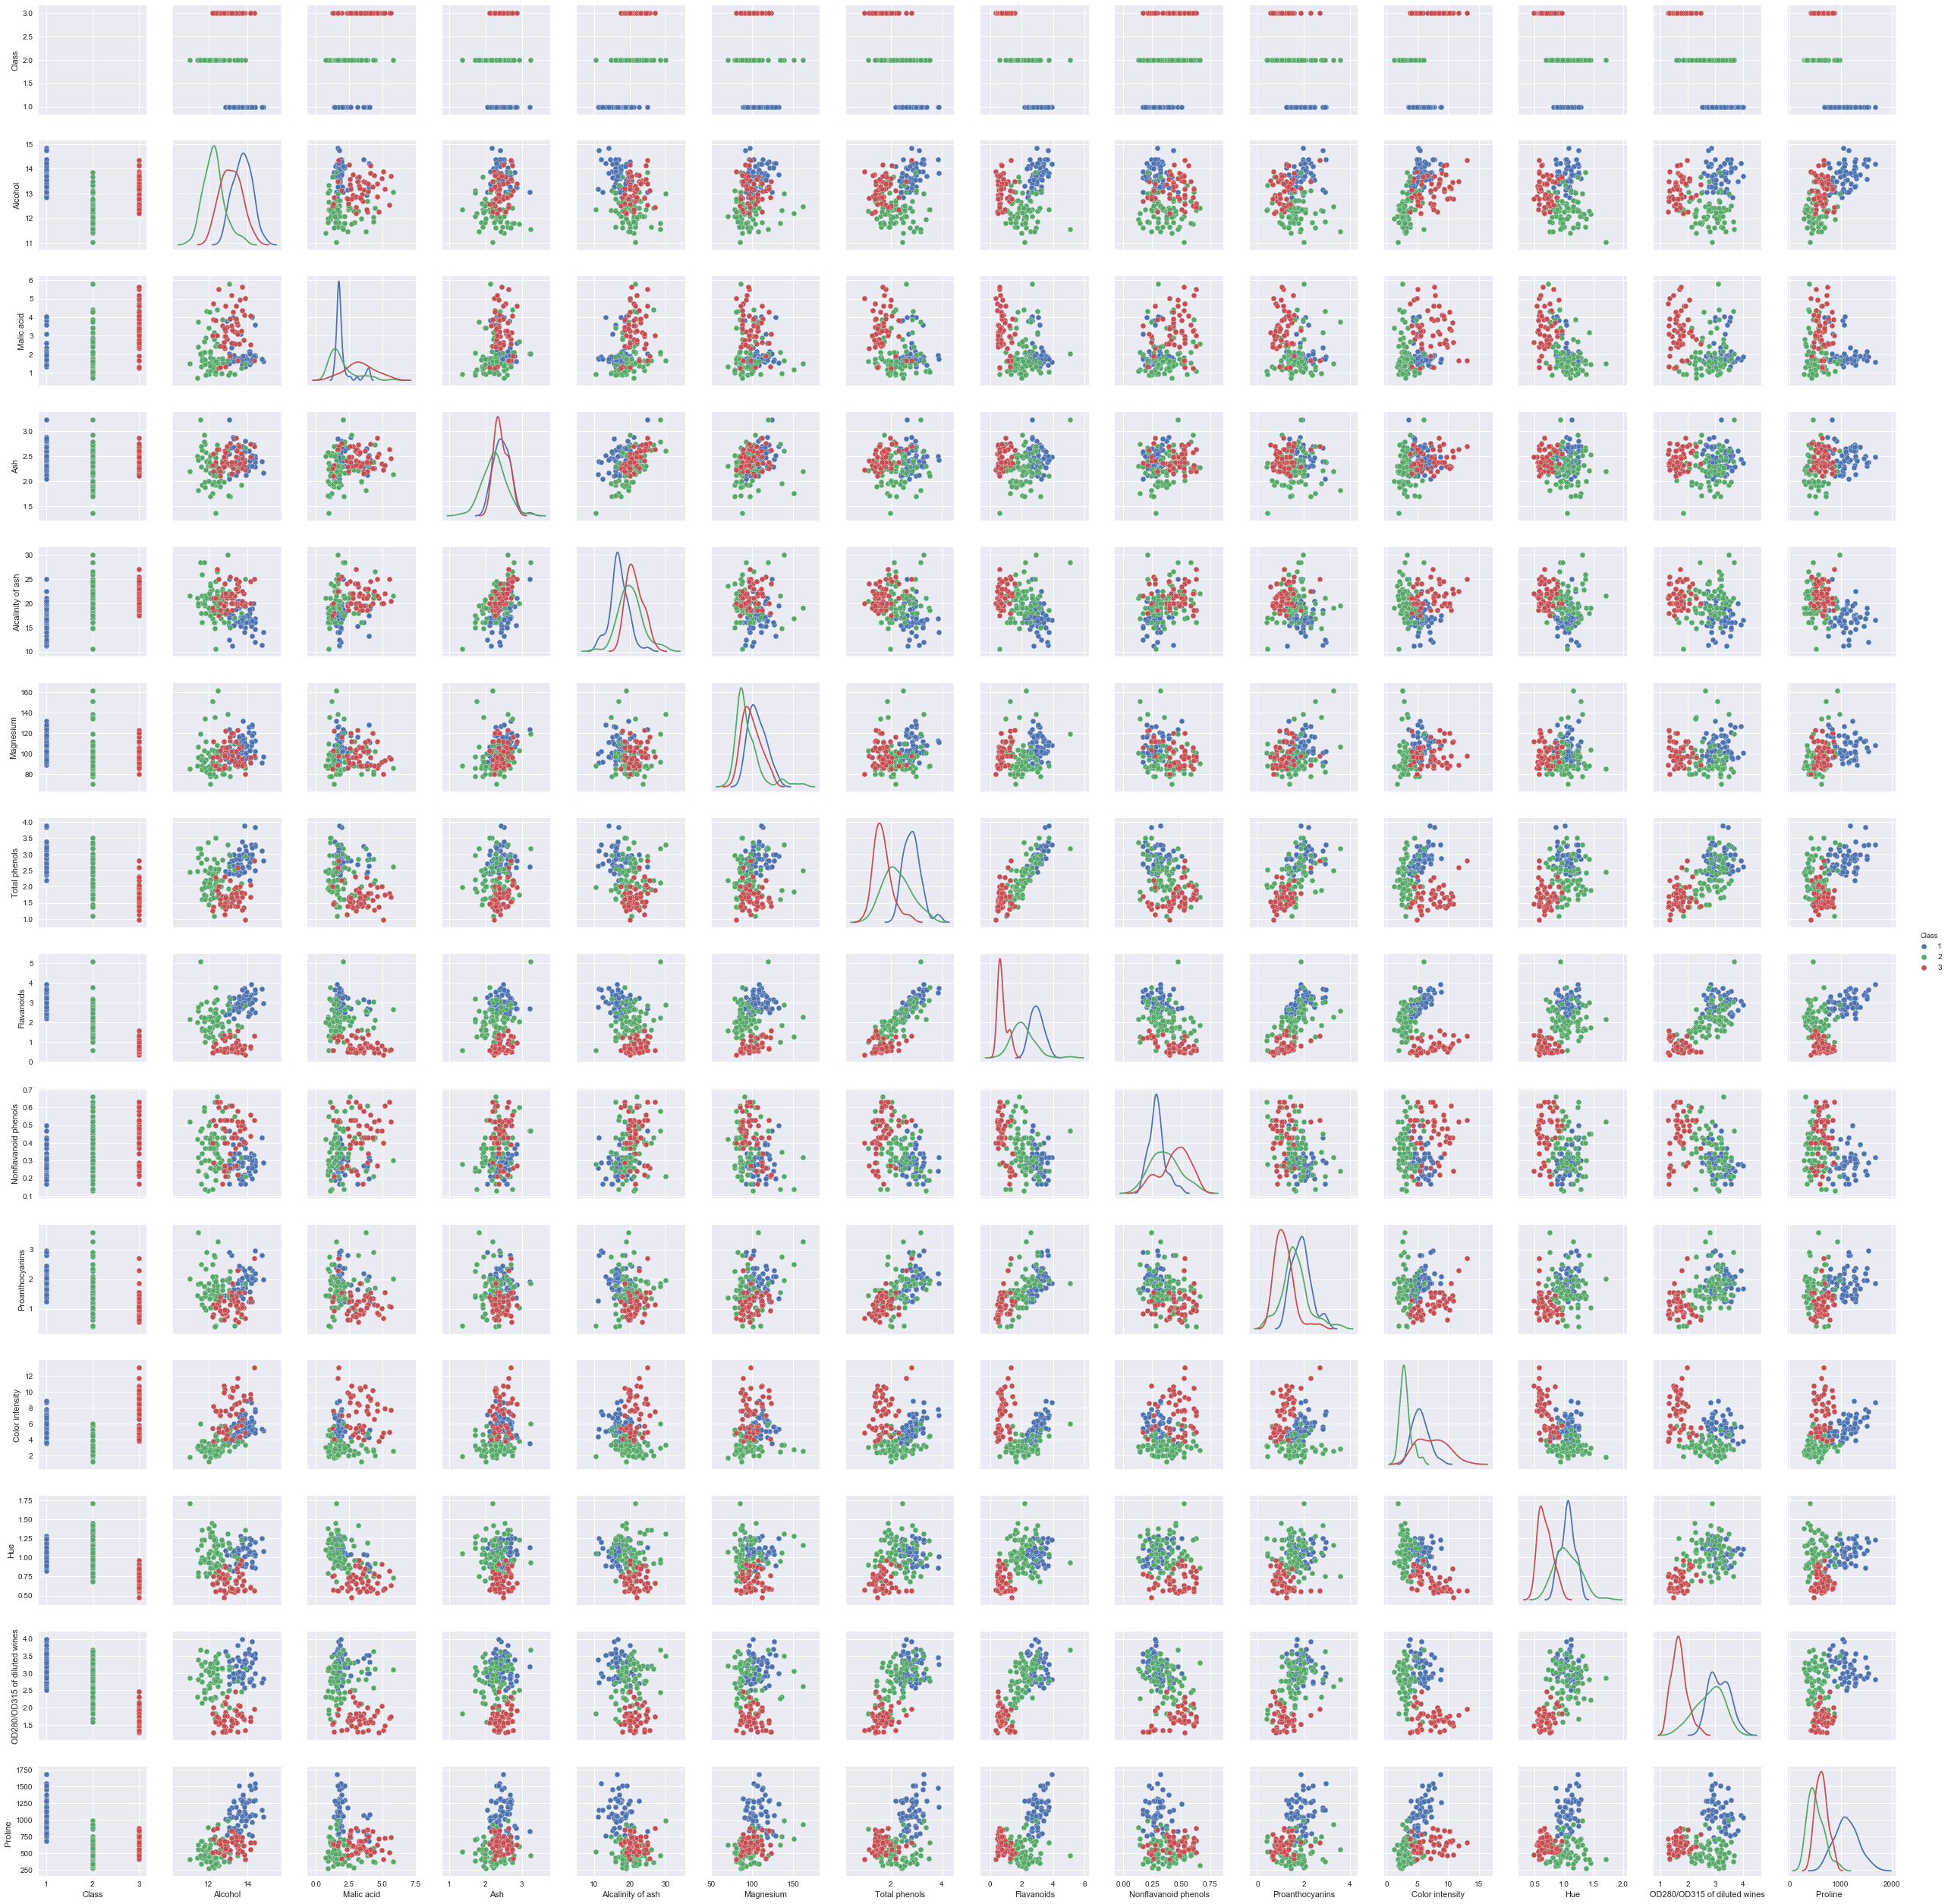

In [15]:
import seaborn as sns
grid = sns.pairplot(full_data, hue="Class", diag_kind="kde")

We have used seaborn package to display the scatterplot's between any two attributes in the data set. The data samples are colored according to their classes and the centroids of these similar scatters are found to predict the class of new data. The pair plot function here is used to perform k-means clustering between all the attributes of the data set.

# SciPy

SciPy is a collection of mathematical algorithms and convenience functions built on the Numeric extension for Python. It adds significant power to the interactive Python session by exposing the user to high-level commands and classes for the manipulation and visualization of data.

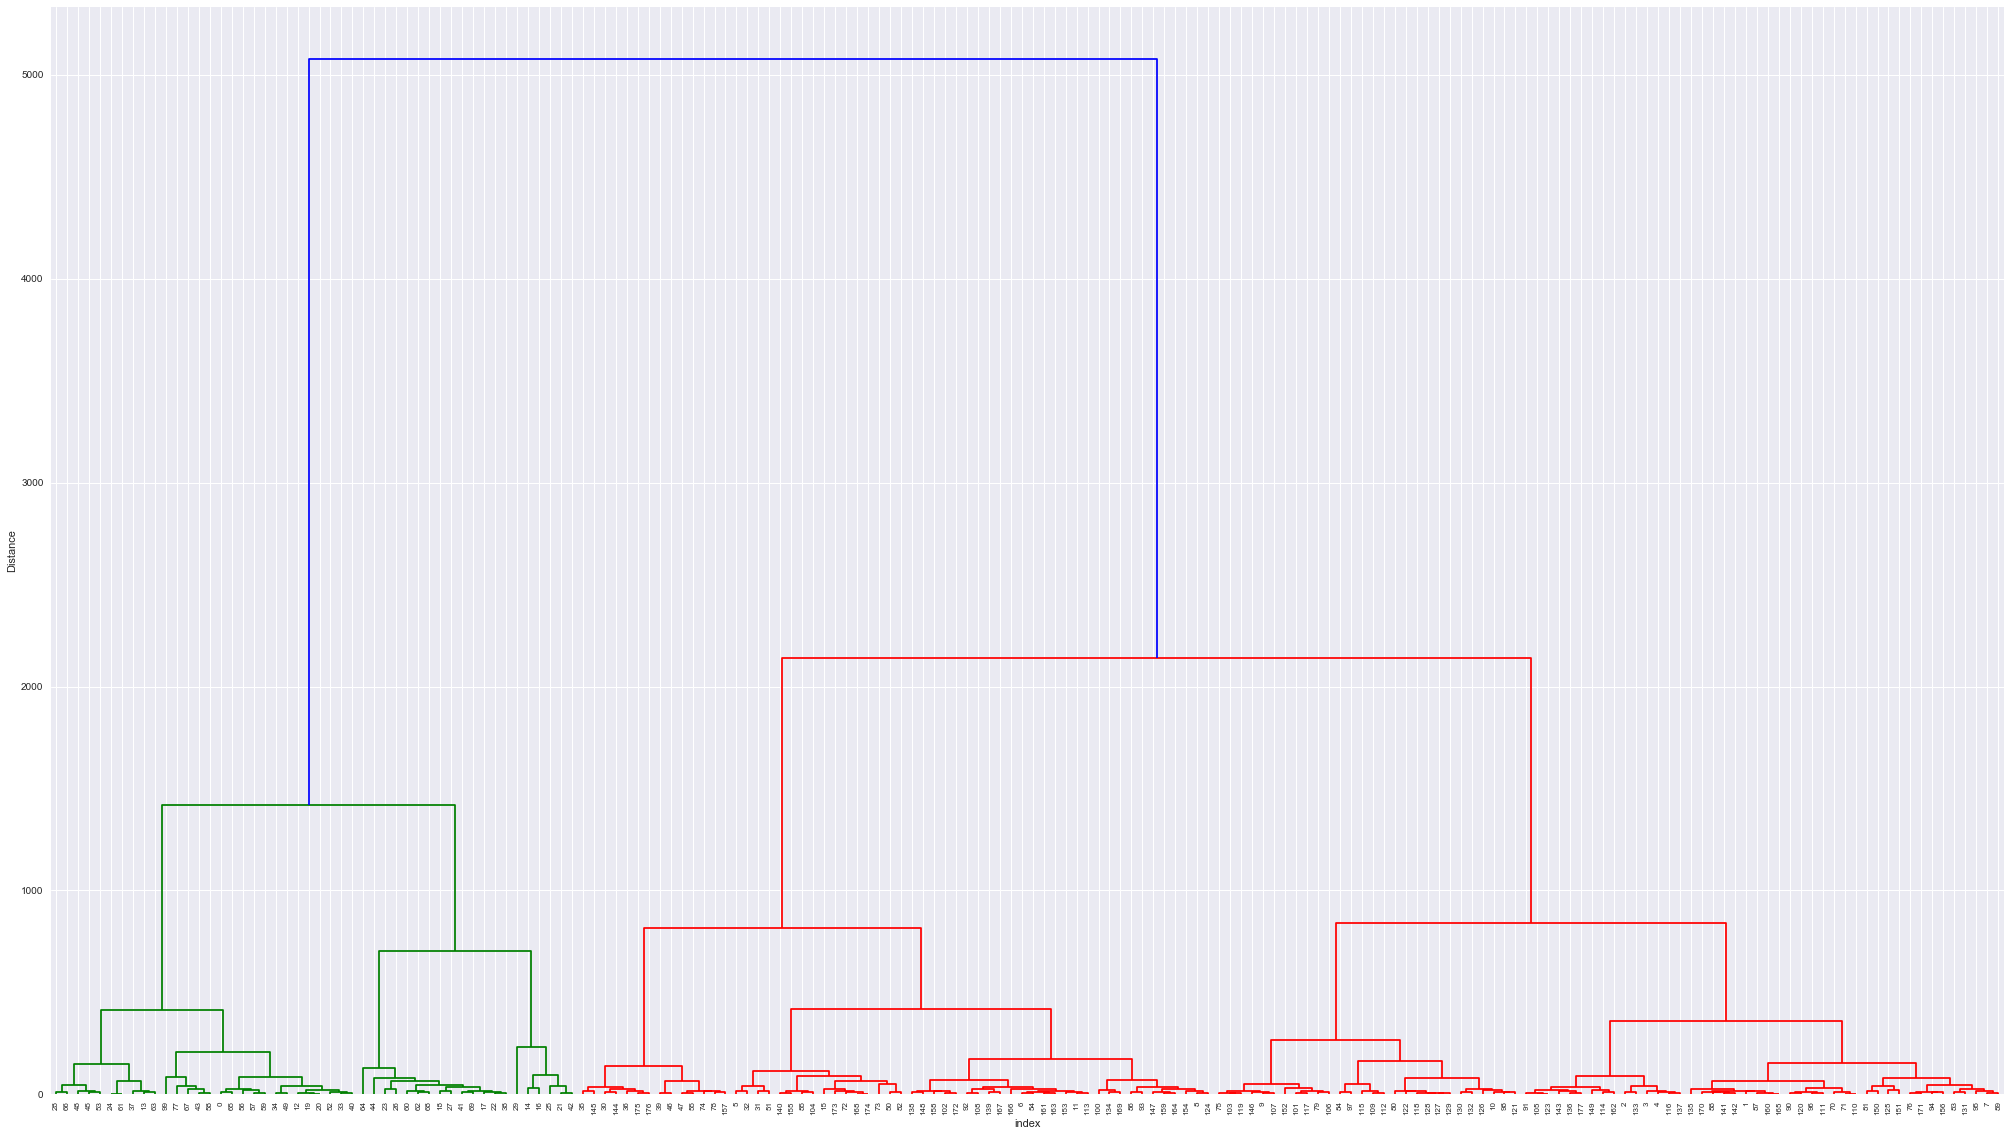

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(full_data, 'ward')
plt.figure(figsize=(35,20))
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

The linkage function performs agglomerative clustering on the data set. The y-axis represents the distance using which we can depict the distance required to combine clusters. The alogrithm stops when all clusters are combined into one. A parameter 'ward' is passed as we are using wards minimum variance method, where objective function is the objective function is the error sum of squares.